<a href="https://colab.research.google.com/github/IrisFDTD/AI-UNIZAR-course/blob/main/eot/ai_unizar_course_scattering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">*Introducción a la inteligencia artificial: redes neuronales avanzadas con Tensorflow-Keras*</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (sergut@unizar.es)</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

```
Sergio G Rodrigo
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






# **Advanced Neural Networks with TensorFlow-Keras**

---
# **Replace numerical methods with neural networks: direct model: numerical method surrogate**
---


#*Extraordinary Optical Transmission (EOT)*

The phenomenom of **Extraordinary optical transmission (EOT)** is a family of EM resonances through subwavelength apertures, in either a flat or a corrugated metallic film [1]. These resonances provide high transmission of light, much more that would be expected for such tiny apertures as compared to the wavelength of light [2]. EOT was discovered in 1998 and since then it has been a very active research field, leading both to the discovery of new ways of enhancing the optical transmission and to its application to sensing, color filters, metamaterials, lenses, optical trapping, enhancement of nonlinear effects, among others [3].

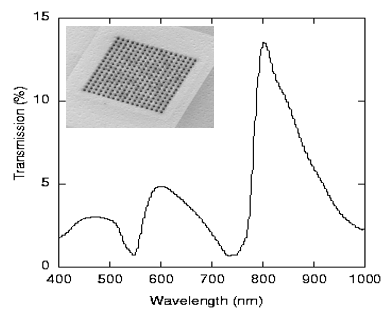

One of the methods to  to calculate the optical response in these system is the so-called **Modal Expansion (ME)**. The ME method (on which the calculations of this notebook are based) Maxwells equations are solved by expanding the electromagnetic (EM) fields in the different regions of space, transmission and reflection coefficients are thus calculated by imposing appropriate boundary conditions (see Ref. [4], and references therein). The whole space is divided in three regions: (I) the cover, (II) holes and, (III) the substrate. In regions (I) and (III) the EM fields are expanded in planes waves. In region (II) in terms of TE and TM waveguide eigenmodes. However, good convergence is attained in many situations only by considering the less decaying transversal electric mode. Within this minimal model results can be worked out analytically.  

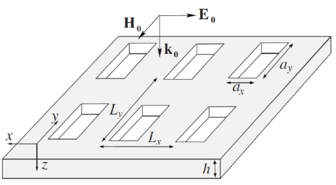

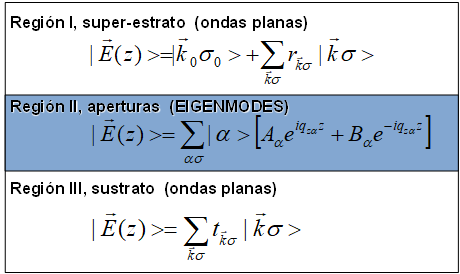




 *References:*

[1] T. W. Ebbesen, H. L. Lezec, H. F. Ghaemi, T. Thio, and P. A. Wolff, [*Extraordinary optical transmission through subwavelength
hole arrays*](https://www.nature.com/articles/35570), Nature 391, 667–669 (1998).

[2] H. A. Bethe, [*Theory of difraction by small holes*](https://journals.aps.org/pr/abstract/10.1103/PhysRev.66.163), Phys. Rev. 66, 163–182 (1944).


[3] S.G. Rodrigo, F. de León-Pérez, and L. Martín-Moreno, [*Extraordinary Optical Transmission: fundamentals and applications*](https://ieeexplore.ieee.org/document/7592449), Proceedings of the IEEE 104, 2288 (2016).

[4] F.J. Garcia-Vidal, L. Martin-Moreno, T.W. Ebbesen, L. Kuipers, [*Light passing through subwavelength apertures*](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.82.729), Rev. Mod. Phys. 82, 729–787 (2010).

[5] S.G. Rodrigo [*Terahertz gas sensor based on absorption-induced transparency (appendix)*](https://epjam.edp-open.org/articles/epjam/pdf/2016/01/epjam160014.pdf) EPJ Appl. Metamat. 3,11 (2016).

# Mount Google Drive (local uploading)

In [1]:
#Your google drive is made accesible to Colab.
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd /content/drive/MyDrive/docencia_2023-2024/curso_IA_2023-2024/AI-UNIZAR-course-github/eot/
    %ls -lht
    # To import own packages set local path in packages syspath
    import sys
    sys.path.insert(0,"./")
except ImportError:
    print("You are not in google.colab!!")
    pass

Mounted at /content/drive/
/content/drive/MyDrive/docencia_2023-2024/curso_IA_2023-2024/AI-UNIZAR-course-github/eot
total 58M
-rw------- 1 root root 662K Oct 23 10:01 ai_unizar_course_scattering.ipynb
-rw------- 1 root root 134K Oct 21 10:16 model_2.keras
-rw------- 1 root root  59K Oct 21 09:58 ai_unizar_course_scattering_calculation_ME.ipynb
-rw------- 1 root root 108K Oct 21 09:29 model_1.keras
-rw------- 1 root root 3.4K Oct 20 20:07 ai_unizar_course_scattering_addon_modal_expansion.py
-rw------- 1 root root  25K Oct 19 18:49 ai_unizar_course_scattering.png
-rw------- 1 root root  57M Aug 10 15:18 PEC_NN_300x15x15x15.xlsx
drwx------ 2 root root 4.0K Aug 10 11:51 __pycache__/


# Clone from Github (remote uploading)

In [ ]:
# Install Git (if not already installed)
!apt-get -q install git

# Replace placeholders with actual values
username = "IrisFDTD"
repository = "AI-UNIZAR-course"

# Clone the repository
repo_url = f"https://@github.com/{username}/{repository}.git"
!git clone {repo_url}

%cd {repository}
%cd ./eot/
%ls -lht

# Main imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import SGD, Adam

# Auxiliary functions

In [3]:
def plot_history(history):
    train_loss = history.history['loss']
    epochs = range(1, len(train_loss) + 1)

    # Extract the validation loss values
    val_loss = history.history['val_loss']

    # Plot the training loss and validation loss vs. epoch
    plt.rcParams.update({'font.size': 14})
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    pass

# Geometrical and material parameters

Material: Perfect Electric Conductor (PEC)

Structure: periodic array of square holes drilled in a PEC film surrounded by air ($\varepsilon_{cover}=\varepsilon_{substrate}=1$)

Calculations with ME: transmittance and reflectance in the visible and near-infrrared range.

Geometrical parameters:
+ $h \in [80nm,400nm], \Delta h=[h]/15$
+ $L \in [400nm,700nm], \Delta L=[L]/15$
+ $a \in [100nm,0.8L], \Delta a=[a]/15$

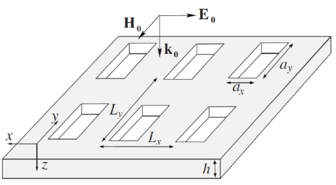

# Load data

+  Each spectrum is calculated at 300 wavelengths from 400.0 nm to 1000.0 nm
+  The database contains 3375 spectra.
+ Data structure: [Metal thickness $h$]; [period $L=L_x=L_y$]; [hole size $a=a_x=a_y$]; [reflection $R$]; [transmission $T$]

In [4]:
# Relative path of the dataset
pathSCATT = "./PEC_NN_300x15x15x15.xlsx"

# Spectra resolution (number of wavelengths)
nwav=300

# Select a reduced number of spectra for training
nospectra_training=100
SCATT = pd.read_excel(pathSCATT,nrows=nospectra_training*nwav)

# Print scattering dataset
SCATT

,width0,L0,a0,lambda0,R,T
0,80.001,400.000100,100.001000,400.001000,1.000000,8.739156e-10
1,80.001,400.000100,100.001000,402.007689,0.997346,2.654320e-03
2,80.001,400.000100,100.001000,404.014378,0.999078,9.220236e-04
3,80.001,400.000100,100.001000,406.021067,0.999383,6.172217e-04
4,80.001,400.000100,100.001000,408.027756,0.999510,4.898476e-04
...,...,...,...,...,...,...
29995,80.001,528.571914,307.551627,991.974244,0.604943,3.950570e-01
29996,80.001,528.571914,307.551627,993.980933,0.608119,3.918814e-01
29997,80.001,528.571914,307.551627,995.987622,0.611260,3.887401e-01
29998,80.001,528.571914,307.551627,997.994311,0.614367,3.856328e-01


# Normalize and randomize data

In [5]:
# Geometric parameters normalized with respect to the maximum wavelength of light
SCATTnorm = SCATT.copy()
max_lambda = SCATT.iloc[:, 3].max()
SCATTnorm.iloc[:, :4] = SCATT.iloc[:, :4] / max_lambda
SCATTnormrnd=SCATTnorm

# Randomize dataset
# Get the number of rows
n_rowsSCATT = len(SCATTnormrnd)
# Generate a random permutation of the row indices
permSCATT = np.random.permutation(n_rowsSCATT)
# Use the permutation to shuffle the rows
SCATTnormrnd = SCATTnormrnd.iloc[permSCATT, :]
# Print scattering dataset (normalized and randomized)
SCATTnormrnd

,width0,L0,a0,lambda0,R,T
13791,0.080001,0.464286,0.100001,0.983947,0.999993,0.000007
3238,0.080001,0.400000,0.257143,0.877592,0.731458,0.268542
14938,0.080001,0.464286,0.177552,0.877592,0.995382,0.004618
22,0.080001,0.400000,0.100001,0.444148,0.999827,0.000173
28335,0.080001,0.528571,0.192246,0.670903,0.974005,0.025995
...,...,...,...,...,...,...
15310,0.080001,0.464286,0.216327,0.420067,0.705379,0.294621
13874,0.080001,0.464286,0.119389,0.548495,0.999662,0.000338
9696,0.080001,0.442857,0.136327,0.592643,0.998619,0.001381
26834,0.080001,0.507143,0.405714,0.668897,0.021683,0.978317


#Set the training and validation data

In [6]:
# Set training and test data from a randomized and normalized dataset
train_data, test_data = train_test_split(SCATTnormrnd, test_size=0.1, random_state=42) #sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

# Select input and output data for the neural network
x_train = train_data.iloc[:, :4]  # get the first 4 columns
y_train = train_data.iloc[:, -1]  # get one of the last 2 column for scattering

x_val = test_data.iloc[:, :4]  # get the first 4 columns
y_val = test_data.iloc[:, -1]  # get one of the last 2 column for scattering

# From pandas to numpy arrays
x_train=np.array(x_train)
x_val=np.array(x_val)

# Define and run the neural network (sequential model)

In [ ]:
network_name='./model_1.keras'

In [ ]:
#hiperparameters
epochs  =		1000
mini_batch_size= 64

In [ ]:
input_neurons=x_train.shape[1] # One neuron for each input parameter
output_neurons=1 # One neuron for value to predict

model=tf.keras.models.Sequential()
model.add(layers.Dense(80, activation='sigmoid', input_shape=(input_neurons,)))
model.add(layers.Dense(80, activation='sigmoid'))
model.add(layers.Dense(output_neurons, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                400       
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 6961 (27.19 KB)
Trainable params: 6961 (27.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = Adam()
model.compile(optimizer=optimizer,loss='mse',metrics=['mse'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=mini_batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))
model.save(network_name)
plot_history(history)

## Results: neural network prediction against true values

./model_1.keras
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                400       
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 6961 (27.19 KB)
Trainable params: 6961 (27.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 5ms/step


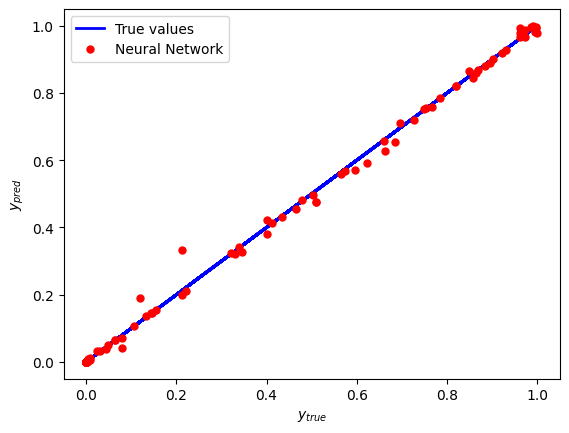

In [ ]:
model=models.load_model(network_name)
print(network_name)
model.summary()
score = model.evaluate(x_val, y_val, verbose=1)

# Check validation dataset with N random values
N=100
range_rnd=np.random.randint(0,len(x_val),size=(1,N))
y_pred=model.predict(x_val[range_rnd[0]])
y_true=y_val.iloc[range_rnd[0]]

# Plot true vs predicted
plt.plot(y_true,y_true, color="blue", fillstyle='none',linewidth=2, marker='.', markersize=0,label='True values')
plt.plot(y_true,y_pred, color="red", linewidth=0, marker='.', markersize=10,label='Neural Network')
plt.xlabel('$y_{true}$')
plt.ylabel('$y_{pred}$')
plt.legend()
plt.show()

## Visualize spectra: neural network prediction against true values

./model_1.keras
index: 66
10/10 [==============================] - 0s 3ms/step
Parameters =
 [[ 80.001      507.14327857 340.20456082 400.001     ]]


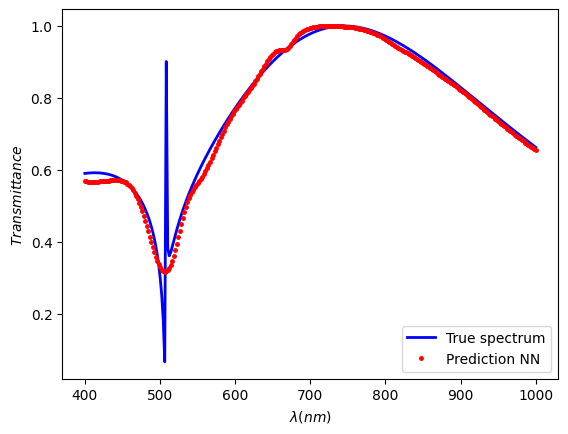

In [ ]:
model=models.load_model(network_name)
print(network_name)

# Number of wavelengths for spectrum
nwav=300

# Use test_data from normalized dataset
train_data, test_data = train_test_split(SCATTnorm, test_size=0.8, shuffle = False)

# Convert to numpy arrays
train_data=np.array(train_data)
test_data=np.array(test_data)

# Test data
x_test = test_data[:, :4]  # get the first 4 columns
y_test = test_data[:, -1] # get one of the last 2 column for scattering

# Random picked spectrum in test
j=np.random.randint(int(x_test.shape[0]/300)) #j-esima wavelength
print('index:',j)

# Wavelengths
wavelengths=x_test[j*nwav:(j+1)*nwav,3]

# Neural Network prediction
nn_pred=model.predict([x_test[j*nwav:(j+1)*nwav]])

# Print the geometrical parameters (normalized)
max_lambda = SCATT.iloc[:, 3].max()
wavelengths=wavelengths*max_lambda
parameters=max_lambda*x_test[j*nwav:(j+1)*nwav, :]
print("Parameters =\n",parameters[0:1])

# Scattering
scatt_true=y_test[j*nwav:(j+1)*nwav]
scatt_pred=nn_pred

# Plot
plt.plot(wavelengths,scatt_true, color="blue", fillstyle='none',linewidth=2, marker='.', markersize=0,label='True spectrum')
plt.plot(wavelengths,scatt_pred, color="red", linewidth=0, marker='.', markersize=5,label='Prediction NN')
plt.xlabel('$\lambda (nm)$')
plt.ylabel('$Transmittance$')
plt.legend()
plt.show()

# Define and run the neural network (multi-input model)

In [ ]:
network_name_multiinput='./model_2.keras'

In [ ]:
input_geo=Input((3,))
input_lambda=Input((1,))

x_geo=Dense(80, activation='sigmoid')(input_geo)
x_geo=Dense(80, activation='sigmoid')(x_geo)

x_lambda=Dense(20, activation='sigmoid')(input_lambda)

x=tf.keras.layers.concatenate([x_geo,x_lambda])
x=Dense(10, activation='sigmoid')(x)
output=Dense(1,activation='sigmoid')(x)

model=tf.keras.Model([input_geo,input_lambda],output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 80)                   320       ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 80)                   6480      ['dense_3[0][0]']             
                                                                                              

In [ ]:
optimizer = Adam()
model.compile(optimizer=optimizer,loss='mse',metrics=['mse'])

In [ ]:
print(x_train[:,-1].shape)
history = model.fit([x_train[:,:3],x_train[:,-1]], y_train,
                    batch_size=mini_batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=([x_val[:,:3],x_val[:,-1]], y_val))

model.save(network_name_multiinput)
plot_history(history)

## Results: neural network prediction against true values

./model_1.keras
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 80)                   320       ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 80)                   6480      ['dense_3[0][0]']             
                                                                              

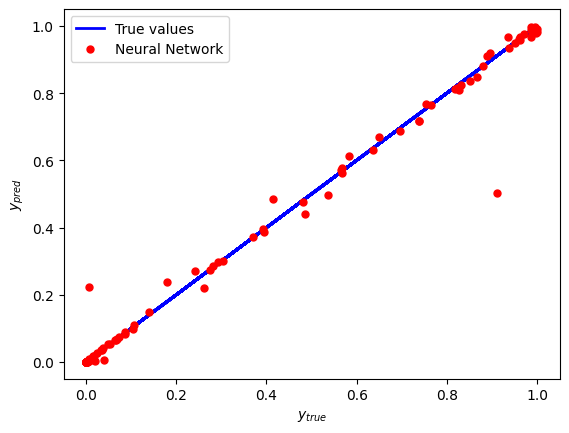

In [ ]:
model=models.load_model(network_name_multiinput)
print(network_name)
model.summary()
score = model.evaluate([x_val[:,:3],x_val[:,-1]], y_val, verbose=1)

# Check validation dataset with N random values
N=100
range_rnd=np.random.randint(0,len(x_val),size=(1,N))
y_pred=model.predict([x_val[range_rnd[0],:3],x_val[range_rnd[0],-1]])
y_true=y_val.iloc[range_rnd[0]]

# Plot true vs predicted
plt.plot(y_true,y_true, color="blue", fillstyle='none',linewidth=2, marker='.', markersize=0,label='True values')
plt.plot(y_true,y_pred, color="red", linewidth=0, marker='.', markersize=10,label='Neural Network')
plt.xlabel('$y_{true}$')
plt.ylabel('$y_{pred}$')
plt.legend()
plt.show()

## Visualize spectra: neural network prediction against true values

index: 12
10/10 [==============================] - 0s 3ms/step
Parameters =
 [[ 80.001      442.85737143 136.32741388 400.001     ]]


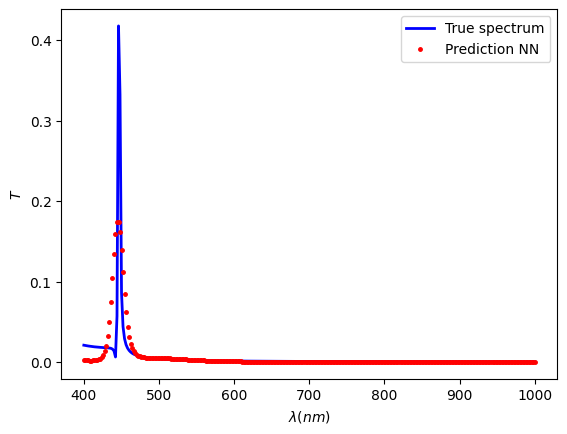

In [ ]:
# Number of wavelengths for spectrum
nwav=300

# Data as pandas dataframes
train_data, test_data = train_test_split(SCATTnorm, test_size=0.8, shuffle = False)

# Convert to numpy arrays
train_data=np.array(train_data)
test_data=np.array(test_data)

# Test data
x_test = test_data[:, :4]  # get the first 4 columns
y_test = test_data[:, -1]  # get the last 2 columns

# Random picked spectrum in test
j=np.random.randint(int(x_test.shape[0]/300)) #j-esima wavelength
print('index:',j)

# Wavelengths
wavelengths=x_test[j*nwav:(j+1)*nwav,3]

# Convert to numpy arrays
nn_pred=model.predict([x_test[j*nwav:(j+1)*nwav,:3],x_test[j*nwav:(j+1)*nwav,-1]])

# Print the geometrical parameters (normalized)
max_lambda = SCATT.iloc[:, 3].max()
wavelengths=wavelengths*max_lambda
parameters=max_lambda*x_test[j*nwav:(j+1)*nwav, :]
print("Parameters =\n",parameters[0:1])

# Scattering
scatt_true=y_test[j*nwav:(j+1)*nwav]
scatt_pred=nn_pred

# Plot
plt.plot(wavelengths,scatt_true, color="blue", fillstyle='none',linewidth=2, marker='.', markersize=0,label='True spectrum')
plt.plot(wavelengths,scatt_pred, color="red", linewidth=0, marker='.', markersize=5,label='Prediction NN')
plt.xlabel('$\lambda (nm)$')
plt.ylabel('$T$')
plt.legend()
plt.show()